Image processing involves performing operations on images to enhance them, extract features, or prepare them for other applications like computer vision or machine learning.

It can be broken into two types: • Analog Image Processing: Applied to hard copies like photographs.

• Digital Image Processing: Manipulation of images in digital form using computers.

Common goals: • Noise reduction • Image enhancement • Image restoration • Object detection and recognition

In [1]:
# ##ip 
# 1 - medical field 
# 2 - remote sensing 
# 3 - industrial app 
# 4 - security 
# 5 - robo 
# 6 - multimedia 

In [2]:
##pixel -- an image is made up of tiny elements 
# called pixels 
#each pixel represents an intensity value 

In [3]:
## there are 2types of images 
# 1 - gray scale image-- black and white -- 1 channel -- 0-255 
# 2 - color scale -- rgb image --3 channel 

##---bit depth -- define how many difff intensity level a pixel can represent 
# 1 -- 1-bit -- black and white --- 2 level
# 2 ----8- bit --- 256 levels of gray scale image (0 = black , 255 white)
# 3 ---24 bit colour image --- RGB -- 8 bit for each channel -- 256x256x256 

In [4]:
##lib used for ip 
#1 - opencv 
# c++ lib with python bindings 
# efficient fro real time cv task 
# pip install opencv-python
#2 - pillow 
# simpler python lib 
# good for basic task 
#pip install pillow

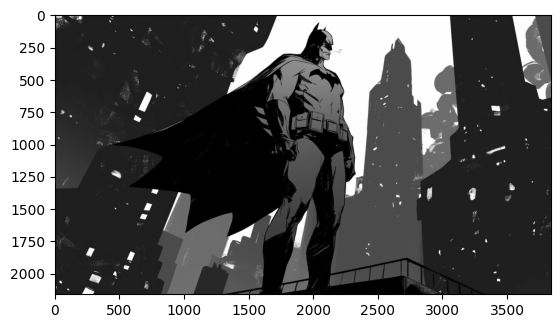

In [5]:
##open cv 
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
plt.imshow(img)
plt.show()
# cv2.imshow("image",img) ## save the image to disk
# cv2.waitKey(0)   ## wait for any key to be pressed
# cv2.destroyAllWindows()  ## close all windows

In [6]:
##pillow 
from PIL import Image
img1 = Image.open(r"D:\c data\06-05-25 download\dc-comics-batman-rooftop-desktop-wallpaper.jpg")
# img.show()
print(img1.size) ## total number of pixel 
print(img.shape)    ##dimension(height,width,channel)
print(img.dtype)    ##data type#

(3840, 2160)
(2160, 3840, 3)
uint8


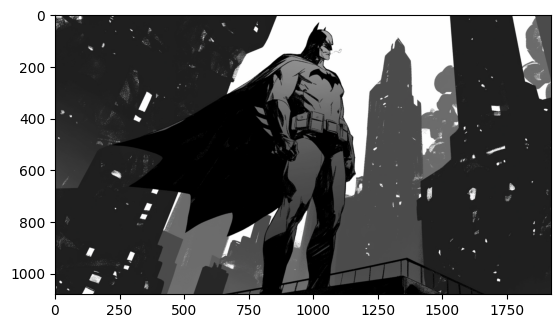

In [7]:
##scaling(resize)-- change the size of an image - either increasing or decreasing
##scaled_img = cv2.resize(img,(width,height))

# scaled_img=cv2.resize(img,(200, 400))
scaled_img = cv2.resize(img , (0, 0), fx=0.5, fy=0.5)
##fx and fy == scaling factors 
##(0,0) -- original size
##height = 200 x 0.5 = 100
plt.imshow(scaled_img)


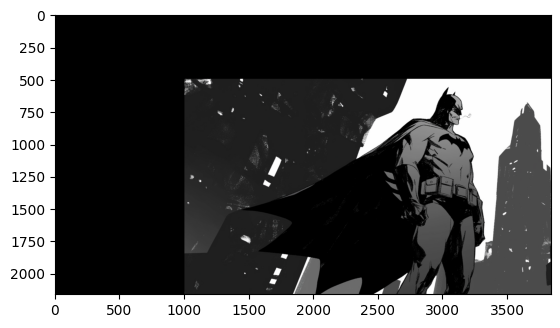

In [8]:
##translation--shift an image vertically or horizontally
import numpy as np 
rows , cols = img.shape[:2]
tx , ty = 1000, 500
##shift right by 1000 and down by 500 
M = np.float32([[1,0,tx],[0,1,ty]])
##[1,0,tx] -- 1 -- keep x -cordinate same 
##0 -- dont mix in thw y - cordinate
##tx - add this amount in x
translated_img = cv2.warpAffine(img,M,(cols,rows))
##wrap affine -- rotation , translation , scaling , shearing
plt.imshow(translated_img)


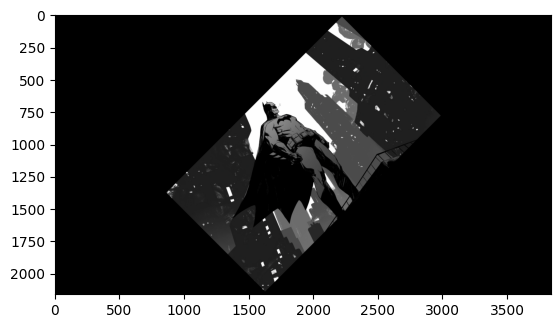

In [9]:
##rotation -- roatate  the image around a center point
center = (cols//2,rows//2)
angle = 45 
scale = 0.5
##zoom in ya zoom out --- 1 == orginal size , <1 == zoom out , >1 == zoom in 
M = cv2.getRotationMatrix2D(center,angle,scale)
rotated_img = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_img)



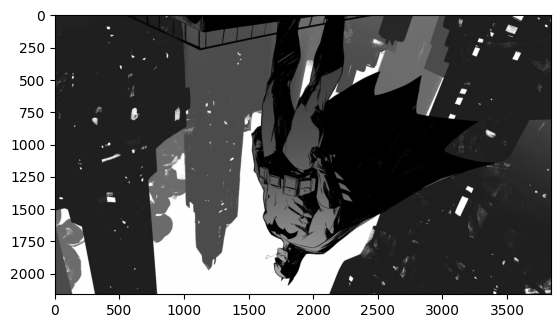

In [10]:
##flipping -- means mirroring the image across an axis 
flipped_img = cv2.flip(img,-1)
##flipcode 
##0 - vertical 
##1 - horizontal 
##-1 -- both 
plt.imshow(flipped_img)

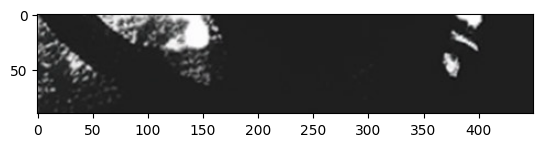

In [11]:
#cropping an image 
##cropping is just slicing an array 
# cropped_img  = image[y1:y2,x1:x2]

cropped = img[10:100, 50:500]
plt.imshow(cropped)

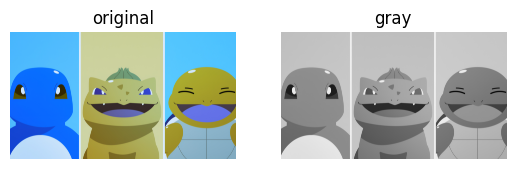

In [14]:
##rgb to grayscale conversion 
##gray = 0.299 . R + 0.587 . G + 0.114 . B
##human eye wo red and green colour are more sensitive
img2 = cv2.imread(r"D:\c data\06-05-25 download\pokemon-starters-trio-desktop-wallpaper.jpg")
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2)
plt.title("original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("gray")
plt.axis("off")
plt.show()

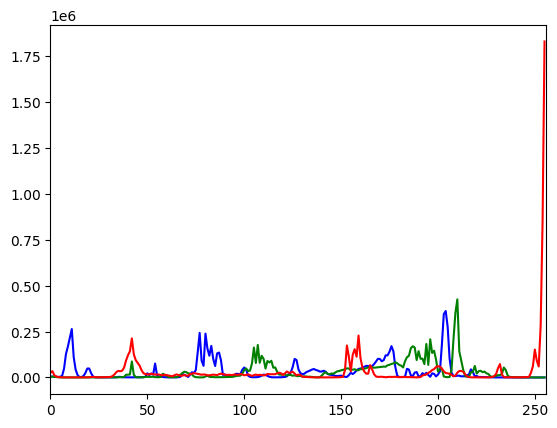

In [ ]:
##histogram -- a graph that represents the distribution 
# of pixel intensity values 
##in an image

import matplotlib.pyplot as plt 
img3 = cv2.imread(r"D:\c data\06-05-25 download\pokemon-starters-trio-desktop-wallpaper.jpg")
color = ("b","g","r")
for i,col in enumerate(color):
    # i -- channel index -- 0,1,2
    #none --mask --compute the histogram for the entire image
    #256 -- number of bins/interval
    #0-255 -- range -- range of pixel values 
    hist = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

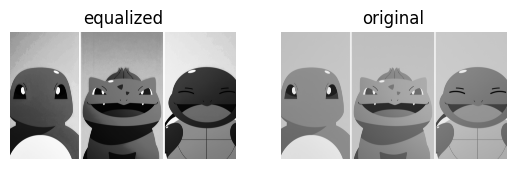

In [22]:
##histogram equalization ---
##equalize the histogram of an image 
##it is done by mapping the intensity values to a uniform distribution

## it improves image contrast by spreading out the most 
#freq intensity values in the image

##note -- image input should be grayscale image 
##equilize hist -- cv2.equalizeHist(img)

eq = cv2.equalizeHist(gray) 
# plt.imshow(eq,cmap="gray")
plt.subplot(1,2,1)
plt.imshow(eq,cmap="gray")
plt.title("equalized")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")
plt.title("original")
plt.axis("off")
plt.show()



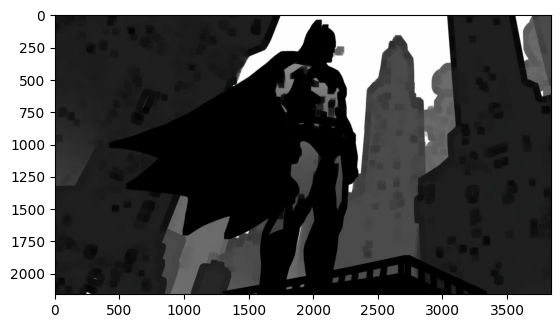

In [30]:
##erosion -- removes white pixels from the boundary of an object 
##it makes white region shrink and black region expand

##dilation -- opposite of erosion 
##it makes black region shrink and white region expand

kernel = np.ones((5,5),np.uint8)
##kernel -- image gets modified using kernel 
eroded = cv2.erode(img,kernel,iterations=10)
plt.imshow(eroded,cmap="gray")
plt.show()



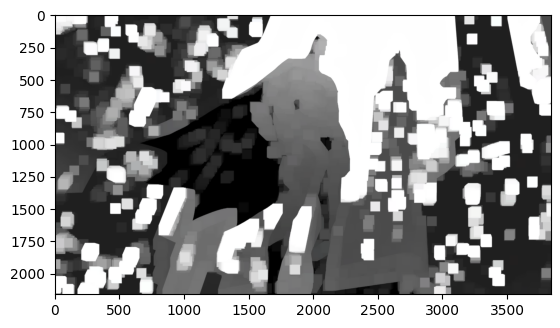

In [34]:
##dilation 
dilated = cv2.dilate(img,kernel,iterations=18)
plt.imshow(dilated,cmap="gray")
plt.show()

In [ ]:
# question
#  Translate an image 100 pixels right and 50 pixels down.
# Use a translation matrix with cv2.warpAffine()

# Use dilation to restore text thickness in a thin-text image.
# Apply cv2.dilate() and display result